In [1]:
import os
import sys
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
root = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(root))
import numpy as np
from src.decision import Decision
from src.outcome import Outcome
from src.probabilistic_event import ProbabilisticEvent
from src.decision_evaluation import evaluate_decision
from src.visualization import plot_distribution, plot_utility_distribution, plot_decision_utility_distribution

In [2]:
# Create a decision
decision = Decision("Vacation Destination")

In [3]:
# Define probabilistic events
event1 = ProbabilisticEvent("Good Weather", "normal", {'mean': 0.7, 'std': 0.1})
event2 = ProbabilisticEvent("Affordable Prices", "uniform", {'start': 0.5, 'end': 0.8})
event3 = ProbabilisticEvent("Interesting Activities", "binomial", {'n': 10, 'p': 0.6})

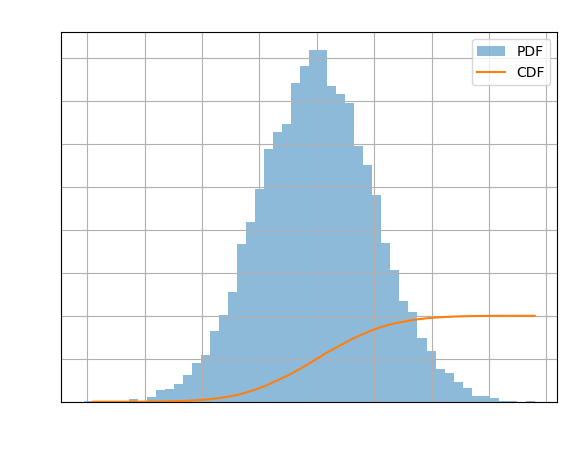

Statistics for Good Weather:
  Mean: 0.70
  Median: 0.70
  Standard Deviation: 0.10
  25th percentile: 0.63
  75th percentile: 0.77


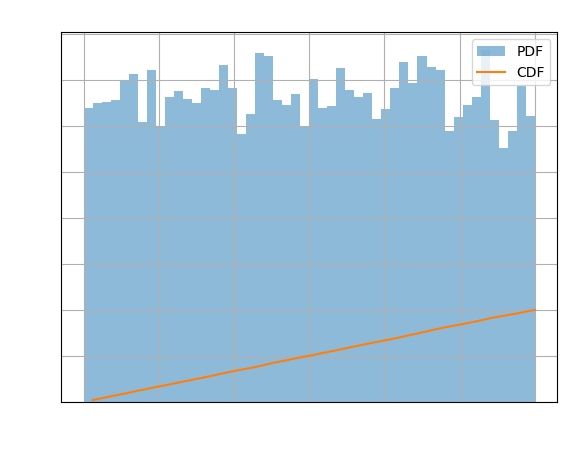

Statistics for Affordable Prices:
  Mean: 0.65
  Median: 0.65
  Standard Deviation: 0.09
  25th percentile: 0.58
  75th percentile: 0.72


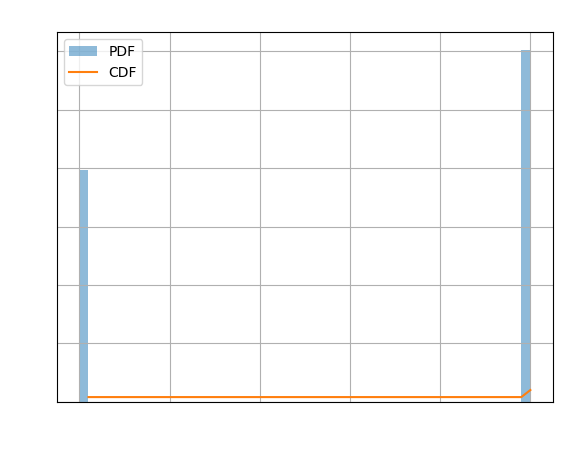

Statistics for Interesting Activities:
  Mean: 0.60
  Median: 1.00
  Standard Deviation: 0.49
  25th percentile: 0.00
  75th percentile: 1.00


In [4]:
# Plot probability distributions for each event
plot_distribution(event1.sample(), "Good Weather")
plot_distribution(event2.sample(), "Affordable Prices")
plot_distribution(event3.sample(), "Interesting Activities")

In [5]:
# Create complementary events
not_event1 = event1.complementary_event()
not_event2 = event2.complementary_event()
not_event3 = event3.complementary_event()

In [6]:
# Define outcomes
outcome1 = Outcome("Beach Vacation", decision.name, [event1, event2], lambda x, y: x * y, lambda x: x * 100)
outcome2 = Outcome("City Tour", decision.name, [event2, event3], lambda x, y: x * y, lambda x: x * 80)
outcome3 = Outcome("Mountain Retreat", decision.name, [event1, event3], lambda x, y: x * y, lambda x: x * 120)
outcome4 = Outcome("Stay Home", decision.name, [not_event1, not_event2, not_event3], lambda x, y, z: x * y * z, lambda x: x * 50)



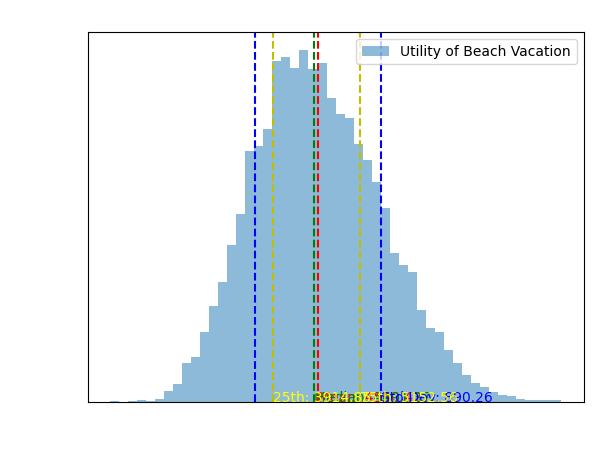

Statistics for Utility of Beach Vacation:
  Mean: 4550.42
  Median: 4491.37
  Standard Deviation: 890.26
  25th percentile: 3914.85
  75th percentile: 5152.56


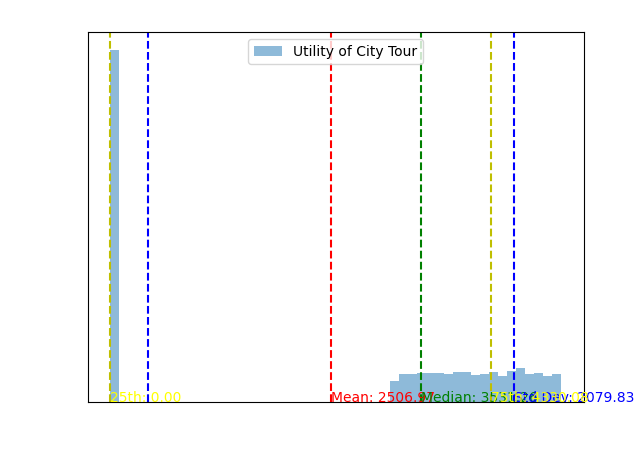

Statistics for Utility of City Tour:
  Mean: 2506.97
  Median: 3531.26
  Standard Deviation: 2079.83
  25th percentile: 0.00
  75th percentile: 4330.08


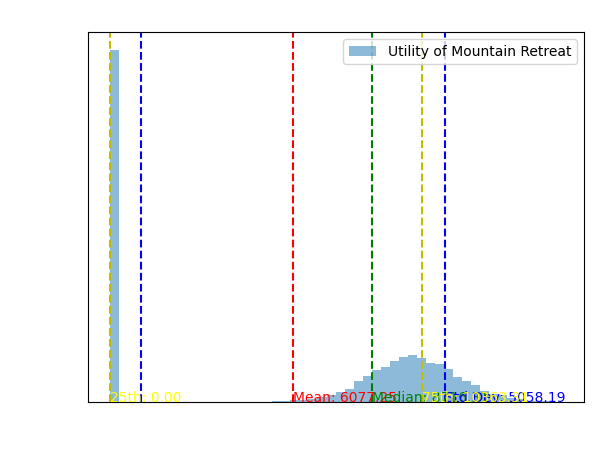

Statistics for Utility of Mountain Retreat:
  Mean: 6077.25
  Median: 8716.31
  Standard Deviation: 5058.19
  25th percentile: 0.00
  75th percentile: 10363.31


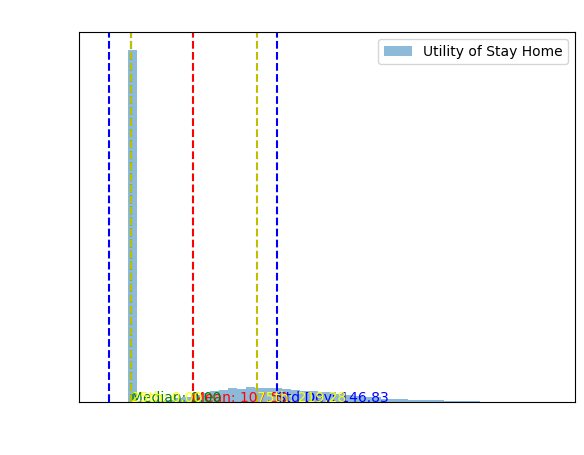

Statistics for Utility of Stay Home:
  Mean: 107.50
  Median: 0.00
  Standard Deviation: 146.83
  25th percentile: 0.00
  75th percentile: 219.28


In [7]:
# Plot utility distributions for each outcome
plot_utility_distribution(outcome1.compute_utility()[1], outcome1.utility_function, "Beach Vacation")
plot_utility_distribution(outcome2.compute_utility()[1], outcome2.utility_function, "City Tour")
plot_utility_distribution(outcome3.compute_utility()[1], outcome3.utility_function, "Mountain Retreat")
plot_utility_distribution(outcome4.compute_utility()[1], outcome4.utility_function, "Stay Home")


In [8]:
# Add outcomes to the decision
decision.add_outcome(outcome1)
decision.add_outcome(outcome2)
decision.add_outcome(outcome3)

In [9]:
# Print decision details
print("Decision:", decision.name)
print("Outcomes:")
for outcome in decision.get_outcomes():
    print("- Name:", outcome.name)
    print("  Events:")
    for event in outcome.events:
        print("  - Name:", event.name)
        print("    Distribution Type:", event.distribution_type)
        print("    Parameters:", event.params)
    print("  Combination Formula:", outcome.combine_formula.__name__)
    print("  Utility Function:", outcome.utility_function.__name__)
    print()

Decision: Vacation Destination
Outcomes:
- Name: Beach Vacation
  Events:
  - Name: Good Weather
    Distribution Type: normal
    Parameters: {'mean': 0.7, 'std': 0.1}
  - Name: Affordable Prices
    Distribution Type: uniform
    Parameters: {'start': 0.5, 'end': 0.8}
  Combination Formula: <lambda>
  Utility Function: <lambda>

- Name: City Tour
  Events:
  - Name: Affordable Prices
    Distribution Type: uniform
    Parameters: {'start': 0.5, 'end': 0.8}
  - Name: Interesting Activities
    Distribution Type: binomial
    Parameters: {'n': 10, 'p': 0.6}
  Combination Formula: <lambda>
  Utility Function: <lambda>

- Name: Mountain Retreat
  Events:
  - Name: Good Weather
    Distribution Type: normal
    Parameters: {'mean': 0.7, 'std': 0.1}
  - Name: Interesting Activities
    Distribution Type: binomial
    Parameters: {'n': 10, 'p': 0.6}
  Combination Formula: <lambda>
  Utility Function: <lambda>



In [10]:
# Evaluate the decision
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision.get_outcomes())

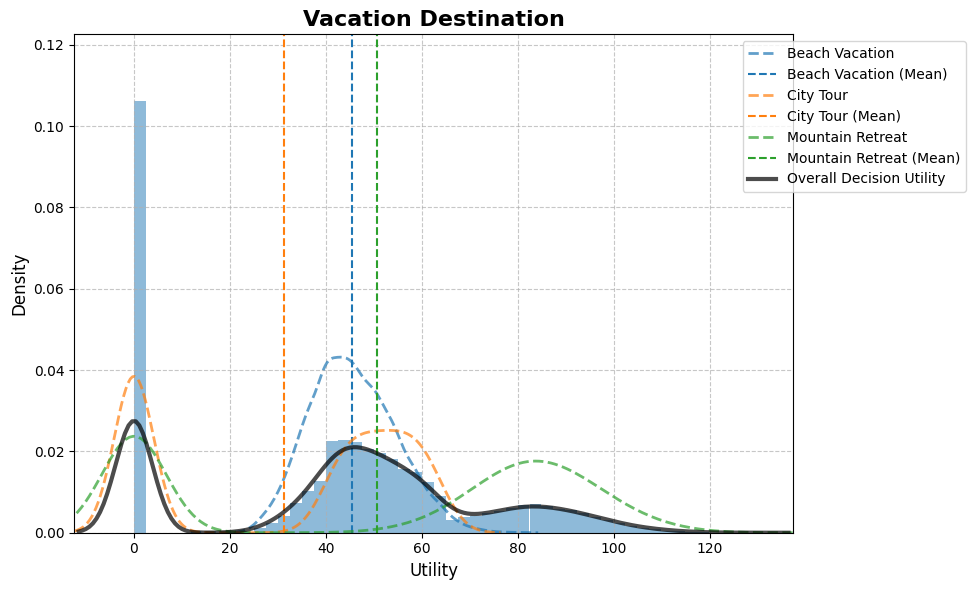

Statistics for Overall Decision Utility:
  Mean: 42.50
  Median: 46.13
  Standard Deviation: 30.18
  25th percentile: 0.00
  75th percentile: 59.92


In [11]:
# Plot decision utility distribution
plot_decision_utility_distribution(decision, all_utility_samples, decision.name, colors=None, fig_size=(10, 6))

In [12]:
# Print evaluation results
print("Evaluation Results:")
print("Final Utilities:")
print(final_utilities)
print("Weighted Average Utility:", weighted_average_utility)
print("All Utility Samples:")
for i, utility_samples in enumerate(all_utility_samples):
    print(f"Outcome {i+1}: {utility_samples}")

Evaluation Results:
Final Utilities:
[54.32868989 64.21538947 47.70860011 ... 87.11677432 69.31320599
  0.        ]
Weighted Average Utility: 42.49502943630723
All Utility Samples:
Outcome 1: [54.32868989 64.21538947 47.70860011 ... 43.07850567 45.18020523
 49.0746813 ]
Outcome 2: [ 0.         60.00027669  0.         ... 47.47118539 62.57537276
  0.        ]
Outcome 3: [  0.         102.74414934   0.         ...  87.11677432  69.31320599
   0.        ]
